In [57]:
import pandas as pd
df = pd.read_json('quotes.json')
df['mod_Quote'] = df['Quote']
df.drop_duplicates(subset ="Quote", keep = 'first', inplace = True)

In [2]:
df.head()

,Quote,Author,Tags,Popularity,Category,mod_Quote
0,"Don't cry because it's over, smile because it ...",Dr. Seuss,"[attributed-no-source, cry, crying, experience...",0.155666,life,"Don't cry because it's over, smile because it ..."
2,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"[attributed-no-source, best, life, love, mista...",0.129122,love,"I'm selfish, impatient and a little insecure. ..."
5,Be yourself; everyone else is already taken.,Oscar Wilde,"[attributed-no-source, be-yourself, honesty, i...",0.113223,inspiration,Be yourself; everyone else is already taken.
6,Two things are infinite: the universe and huma...,Albert Einstein,"[attributed-no-source, human-nature, humor, in...",0.103127,humor,Two things are infinite: the universe and huma...
9,"Be who you are and say what you feel, because ...",Bernard M. Baruch,"[ataraxy, be-yourself, confidence, fitting-in,...",0.101890,,"Be who you are and say what you feel, because ..."


In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemming = PorterStemmer()
stop_list = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
import re
reg = re.compile(r'[a-zA-Z]')

def remove_noise(quote_word):
    words = word_tokenize(quote_word)
    currentQuote = []
    for word in words:
        if word not in stop_list and word.isalpha() and word not in [",", ".", "!", " ", ";"] and reg.match(word):
                currentQuote.append(stemming.stem(word.lower()))
    
    return " ".join(currentQuote)
    
df['mod_Quote'] = df['mod_Quote'].apply(remove_noise)

In [5]:
df['mod_Quote']

0                                      do cri smile happen
2        i selfish impati littl insecur i make mistak i...
5                             be everyon els alreadi taken
6        two thing infinit univers human stupid i sure ...
9                      be say feel mind matter matter mind
                               ...                        
48386    in buddhism say attach anyth lead suffer so la...
48387                      i love british humor it surreal
48388                         i got sens humor i funni guy
48389      humor wonder thing help realiz fool beauti time
48390                     life is full obstacl stumbl upon
Name: mod_Quote, Length: 36937, dtype: object

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['mod_Quote'])

tx = pd.DataFrame(data = X.toarray(), columns = vectorizer.get_feature_names())


In [61]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 500)
md = svd.fit_transform(X)
len(md)

36937

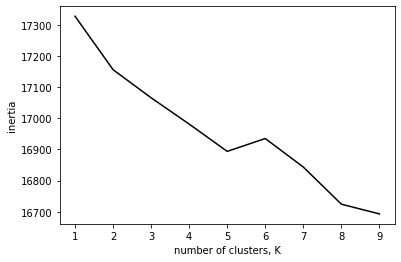

In [ ]:
import matplotlib.pyplot as plt 

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters =k)
    model.fit(md)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-0')
plt.xlabel('number of clusters, K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [62]:
from sklearn.cluster import KMeans
import random

kmeans = KMeans(n_clusters = 6)
kmeans.fit(md)
labels = kmeans.predict(md)
xd = pd.DataFrame({'labels': labels, 'quotes': df['Quote']})
xd.sort_values(by='labels')
test = xd.groupby('labels').groups


In [63]:
full_quote_words=[]

for key in test:
    text = ''
    for wordItem in test[key]:
        text += '' + df['mod_Quote'][wordItem]
    full_quote_words.append(text)

In [11]:
import sys
!{sys.executable} -m pip install WordCloud

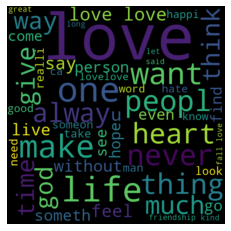

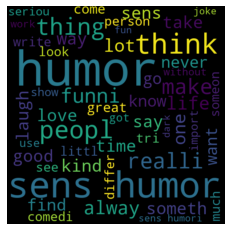

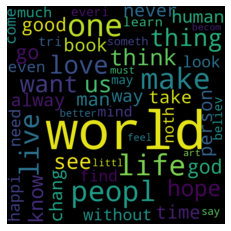

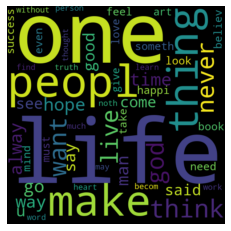

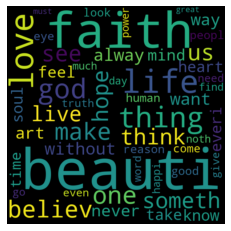

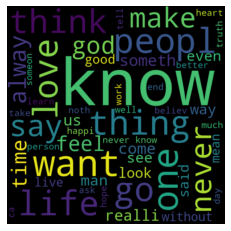

In [64]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

for item in full_quote_words:
    wordcloud =  WordCloud(width=600, height=600, max_words=50).generate(item)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


Testing 


In [65]:
test2 = "If everyone is moving forward together, then success takes care of itself."
remove_noise(test2)
Xt = vectorizer.fit_transform([test2])
Xt.toarray()
print(Xt.toarray())
mod_Pt = [0 for i in range(0, 500)]
for i in range(len(Xt.toarray()[0])):
  mod_Pt[i] = Xt.toarray()[0][i]
pred_group =  kmeans.predict([mod_Pt])[0]
pred_group



[[0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513
  0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513]]


0

In [66]:
df['Quote'][test[pred_group][2]]

'We accept the love we think we deserve.'

D:\Stuff\Softwares\anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


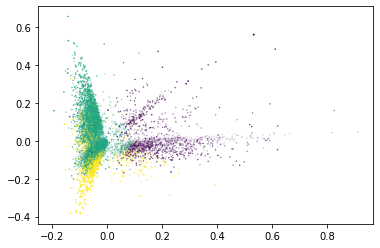

In [67]:
plt.scatter(md[:,1], md[:,2], md[:,3], c =labels )
plt.show()

In [68]:
from sklearn.externals import joblib

joblib.dump(kmeans, 'quotes_model.pkl')
 
# Load the model from the file
savedModel = joblib.load('quotes_model.pkl')
 
# Use the loaded model to make predictions
savedModel

trainedGroups = test

In [69]:
test2 = "Marriages are made in heaven"
remove_noise(test2)
Xt = vectorizer.fit_transform([test2])

mod_Pt = [0 for i in range(0, 500)]
for i in range(len(Xt.toarray()[0])):
  mod_Pt[i] = Xt.toarray()[0][i]
pred_group =  savedModel.predict([mod_Pt])[0]

pred_group

0

In [70]:
print(df['Quote'][trainedGroups[pred_group][2]])

We accept the love we think we deserve.


In [71]:
modifiedPredData = {}

for item in trainedGroups:
    lt = []
    
    for quote in trainedGroups[item]:
        lt.append(df['Quote'][quote])
    modifiedPredData[item] = lt

modifiedPredData


{0: ["You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth.",
  'Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that.',
  'We accept the love we think we deserve.',
  'It is better to be hated for what you are than to be loved for what you are not.',
  'As he read, I fell in love the way you fall asleep: slowly, and then all at once.',
  'It is not a lack of love, but a lack of friendship that makes unhappy marriages.',
  'I love you without knowing how, or when, or from where. I love you simply, without problems or pride: I love you in this way because I do not know any other way of loving but this, in which there is no I or you, so intimate that your hand upon my chest is my hand, so intimate that when I fall asleep your eyes close.',
  "Have you ever been in love? Horrible isn't it? It makes you so vulnerable. It opens your chest a

In [46]:
trainedGroups[0].tolist()

[23,
 35,
 137,
 206,
 284,
 288,
 294,
 374,
 435,
 447,
 473,
 489,
 496,
 506,
 532,
 545,
 578,
 611,
 613,
 700,
 713,
 733,
 776,
 828,
 883,
 932,
 937,
 946,
 997,
 1043,
 1112,
 1149,
 1185,
 1217,
 1269,
 1286,
 1324,
 1348,
 1377,
 1384,
 1444,
 1470,
 1484,
 1613,
 1639,
 1694,
 1717,
 1735,
 1757,
 1767,
 1797,
 1813,
 1830,
 1844,
 1911,
 1915,
 1989,
 2020,
 2037,
 2099,
 2126,
 2136,
 2164,
 2190,
 2220,
 2224,
 2259,
 2325,
 2333,
 2351,
 2390,
 2476,
 2495,
 2624,
 2669,
 2675,
 2725,
 2726,
 2871,
 2939,
 2954,
 2968,
 3030,
 3031,
 3043,
 3053,
 3081,
 3087,
 3099,
 3104,
 3123,
 3135,
 3177,
 3184,
 3204,
 3230,
 3356,
 3396,
 3457,
 3481,
 3527,
 3532,
 3541,
 3542,
 3543,
 3570,
 3576,
 3642,
 3656,
 3874,
 3887,
 3936,
 3946,
 3979,
 4001,
 4015,
 4034,
 4054,
 4068,
 4173,
 4201,
 4202,
 4232,
 4245,
 4265,
 4290,
 4365,
 4536,
 4563,
 4604,
 4629,
 4648,
 4681,
 4715,
 4722,
 4812,
 4821,
 4858,
 4897,
 4909,
 4911,
 4932,
 4953,
 4965,
 5059,
 5067,
 5095,
 5

In [56]:
import json
  
# Write pretty print JSON data to file
with open("trainPred.json", "w") as write_file:
    json.dump(modifiedPredData, write_file, indent=4)